
# Evaluating a predictive model

This notebook will:

- Introduce linear models for regression tasks
- Demonstrate scikit-learn's user API
- Explain training and testing error concepts
- Cover cross-validation techniques
- Compare models against baselines

## Linear regression introduction

Let's start with linear regression fundamentals. We'll use only NumPy initially,
before introducing scikit-learn. First, we load our dataset.

In [1]:
# When using JupyterLite, you will need to uncomment and install the `skrub` package.
%pip install skrub
import matplotlib.pyplot as plt
import skrub

skrub.patch_display()  # make nice display for pandas tables


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

data = pd.read_csv("../datasets/penguins_regression.csv")
data

Processing column   2 / 2


Flipper Length (mm)  Body Mass (g)
0                  181.0         3750.0
1                  186.0         3800.0
2                  195.0         3250.0
3                  193.0         3450.0
4                  190.0         3650.0
..                   ...            ...
337                207.0         4000.0
338                202.0         3400.0
339                193.0         3775.0
340                210.0         4100.0
341                198.0         3775.0

[342 rows x 2 columns]


Our dataset contains penguin flipper lengths and body masses. We want to predict a
penguin's body mass from its flipper length. Since we predict a continuous value,
this is a regression problem.

Let's visualize the relationship between these measurements:

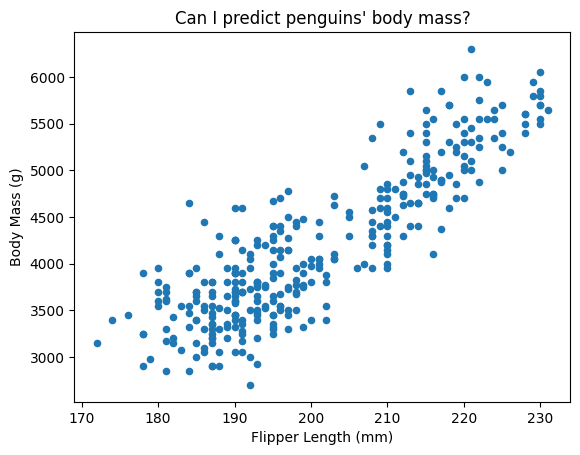

In [3]:
from matplotlib import pyplot as plt

ax = data.plot.scatter(x=data.columns[0], y=data.columns[1])
ax.set_title("Can I predict penguins' body mass?")
plt.show()


The data shows a clear linear trend - longer flippers correlate with heavier penguins.
We'll model this relationship linearly.

In this example:

- Flipper length serves as our feature (predictor variable)
- Body mass is our target (variable to predict)

Each (flipper length, body mass) pair forms a sample. We train our model on these
feature/target pairs. At prediction time, we use only features to predict potential
targets. To evaluate our model, we compare its predictions against known targets.

Throughout this notebook, we use:
- `X`: feature matrix with shape `(n_samples, n_features)`
- `y`: target vector with shape `(n_samples,)`

In [4]:
X, y = data[["Flipper Length (mm)"]], data[["Body Mass (g)"]]


We model the X-y relationship linearly as:

$$
y = X \beta
$$

where $\beta$ represents our model coefficients. For all features, this expands to:

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n
$$

Here we have only one feature coefficient $\beta_1$ for flipper length.

Finding the optimal $\beta$ means finding values that minimize prediction error. We
calculate $\beta$ using:

$$
X^T y = X^T X \beta
$$

which gives us:

$$
\beta = (X^T X)^{-1} X^T y
$$


**EXERCISE**

1. Use NumPy to find $\beta$ ($\beta_0$ and $\beta_1$) using the normal equation
2. Calculate predictions using your $\beta$ values and X
3. Plot the original data (X vs y) and overlay your model's predictions

Processing column   1 / 1


Column,Column name,dtype,Null values,Unique values,Mean,Std,Min,Median,Max
0,Body Mass (g),Float64DType,0 (0.0%),2 (100.0%),-2.87e+03,4.12e+03,-5.78e+03,-5.78e+03,49.7


Processing column   1 / 1


Body Mass (g)
0      3212.256161
1      3460.683993
2      3907.854091
3      3808.482958
4      3659.426259
..             ...
337    4504.080888
338    4255.653056
339    3808.482958
340    4653.137587
341    4056.910790

[342 rows x 1 columns]

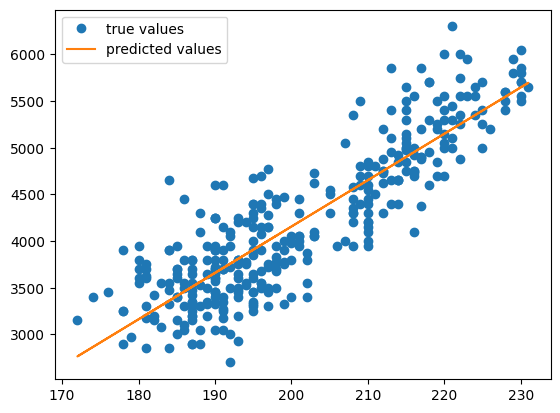

In [5]:
# sylvaincom's code

# but never compute the inv as it costly and not numerically stable
import numpy as np
from numpy.linalg import inv

X_stack = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
beta = inv(X_stack.T @ X_stack) @ X_stack.T @ y
display(beta)

y_pred = X_stack @ beta
display(y_pred)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(X_stack[:, 1], y, "o", label="true values")
plt.plot(X_stack[:, 1], y_pred, label="predicted values")
plt.legend()
plt.show()

In [6]:
# guillaume

X_numpy = X.to_numpy()
X_numpy.shape

(342, 1)

In [7]:
y_numpy = y.to_numpy()

In [8]:
X_with_dummy = np.concatenate(
    [np.ones(shape=X_numpy.shape), X_numpy],
    axis=1
)
X_with_dummy.shape

(342, 2)

In [ ]:
from numpy import linalg  # linear algebra

# no need for parentheses for operation priority
# beta = inv(X.T X) X.T y
beta = linalg.inv(X_with_dummy.T @ X_with_dummy) @ X_with_dummy.T @ y_numpy
beta # first value is intercept and second one is the coefficient

array([[-5780.83135808],
       [   49.68556641]])

In [ ]:
X_pandas = X.copy() # beware of overwrite
X_pandas.insert(0, "Intercept", 1)

In [13]:
X_pandas

Processing column   2 / 2


Intercept  Flipper Length (mm)
0            1                181.0
1            1                186.0
2            1                195.0
3            1                193.0
4            1                190.0
..         ...                  ...
337          1                207.0
338          1                202.0
339          1                193.0
340          1                210.0
341          1                198.0

[342 rows x 2 columns]

In [ ]:
beta = linalg.inv(X_pandas.T @ X_pandas) @ X_pandas.T @ y
beta # but it's not really called body mass

Column,Column name,dtype,Null values,Unique values,Mean,Std,Min,Median,Max
0,Body Mass (g),Float64DType,0 (0.0%),2 (100.0%),-2.87e+03,4.12e+03,-5.78e+03,-5.78e+03,49.7


In [ ]:
# y = X @ beta
# (n_samples, 2) @ (2, 1) -> (n_samples, 1)
y_pred = X_with_dummy @ beta  # or y_hat
y_pred

Processing column   1 / 1


Body Mass (g)
0      3212.256161
1      3460.683993
2      3907.854091
3      3808.482958
4      3659.426259
..             ...
337    4504.080888
338    4255.653056
339    3808.482958
340    4653.137587
341    4056.910790

[342 rows x 1 columns]

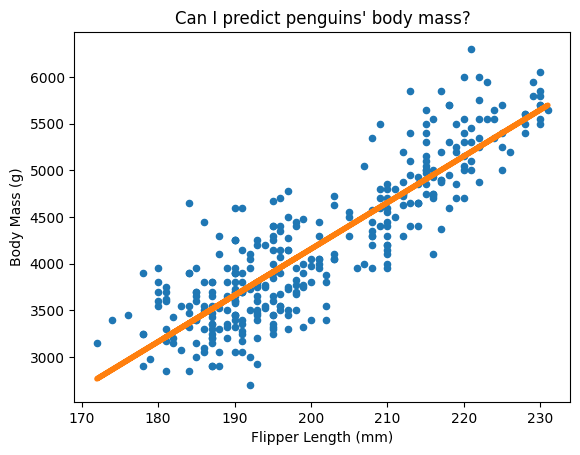

In [ ]:
# using ax is more generalizable because plt.figure can only do 1 plot
# seaborn is an overkill
# plotting from pandas so you already have the names of the features, matplotlib as a backend

ax = data.plot.scatter(x=data.columns[0], y=data.columns[1])
ax.plot(X, y_pred, color="tab:orange", linewidth=4)
ax.set_title("Can I predict penguins' body mass?")
plt.show()

In [21]:
beta

Processing column   1 / 1


Column,Column name,dtype,Null values,Unique values,Mean,Std,Min,Median,Max
0,Body Mass (g),Float64DType,0 (0.0%),2 (100.0%),-2.87e+03,4.12e+03,-5.78e+03,-5.78e+03,49.7


interpretation
- intercept, not at (0, 0)
- 1mm more is adding  50g


## Scikit-learn API introduction

Scikit-learn uses Python classes to maintain model state. These classes provide:

- A `fit` method to learn parameters
- A `predict` method to generate predictions

**EXERCISE**

Create a Python class that implements the linear model from above with:

- A `fit` method to compute $\beta$
- A `predict` method that outputs predictions for input X

In [25]:
beta_numpy = beta.to_numpy()

In [28]:
print(beta_numpy[0])
print(beta_numpy[1:])

[-5780.83135808]
[[49.68556641]]


In [ ]:
# Write your code here.

class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        X = X.copy() # to not modify the original data
        if self.fit_intercept:
            X["Intercept"] = 1
        self.beta_ = linalg.inv(X.T @ X) @ X.T @ y # _ because only exists at fit
        return self # for pipeline operation such as model.fit(X, y).predict(X)
    
    def predict(self, X):
        X = X.copy()
        if self.fit_intercept:
            X["Intercept"] = 1
        y_pred = X @ self.beta_.to_numpy()
        return y_pred
    
model = MyLinearRegression().fit(X, y)
model.predict(X)

Processing column   1 / 1


0
0    3212.256161
1    3460.683993
2    3907.854091
3    3808.482958
4    3659.426259
..           ...
337  4504.080888
338  4255.653056
339  3808.482958
340  4653.137587
341  4056.910790

[342 rows x 1 columns]

In [ ]:
# Write your code here.

from sklearn.utils.validation import check_array

# BaseEstimator for get_params and set_params in grid search
# in scikit-learn, everything is numpy: if pandas, converts to numpy then does operations, then returns pandas
# sklearn.preprocessing.add_numpy_feature

class MyLinearRegression(BaseEstimator):
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        X = check_array(X) # makes copy
        if self.fit_intercept:
            np.concat(...)
        self.beta_ = linalg.inv(X.T @ X) @ X.T @ y # _ because only exists at fit
        self.intercept_ = beta[0] if self.fit_intercept else None
        self.coef_ = beta[1:]
        return self # for pipeline operation such as model.fit(X, y).predict(X)
    
    def predict(self, X):
        check_is_fitted(self, "beta_") # does hasattr(self, "beta_")
        X = X.copy()
        if self.fit_intercept:
            X["Intercept"] = 1
        y_pred = X @ self.beta_.to_numpy()
        return y_pred
    
model = MyLinearRegression().fit(X, y)
model.predict(X)

# see scikit-learn source code: does many validation, accepts sparse matrix ; sample weight
# simple tasks, but if you want to be generic, it gets complicated
# nnls
# if sparse, beware of scaling
# some solver preprocess the data in LinearRegression ; but just do pipeline with scaling if needed


Now let's use scikit-learn's built-in `LinearRegression` model instead of our
implementation.

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()


Scikit-learn models store fitted parameters as attributes ending in underscore.
Our linear model stores `coef_` and `intercept_`:

In [34]:
model.coef_, model.intercept_

(array([[49.68556641]]), array([-5780.83135808]))


## Cross-validation for proper model evaluation

Let's evaluate our model's performance:

In [35]:
from sklearn.metrics import r2_score

score = r2_score(y, model.predict(X))
print(f"Model score: {score:.2f}")

Model score: 0.76



This evaluation has a flaw. A model that simply memorizes training data would score
perfectly. We need separate training and testing datasets to truly assess how well
our model generalizes to new data. The training error measures model fit, while
testing error measures generalization ability.

Let's split our data into training and testing sets:

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([[49.5057081]]), array([-5741.26490436]))

In [37]:
train_score = r2_score(y_train, model.predict(X_train))
print(f"Training score: {train_score:.2f}")

Training score: 0.75


In [38]:
test_score = r2_score(y_test, model.predict(X_test))
print(f"Testing score: {test_score:.2f}")

Testing score: 0.78



Our model performs slightly worse on test data than training data. For comparison,
let's examine a decision tree model which can show more dramatic differences:

In [39]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [40]:
train_score = r2_score(y_train, model.predict(X_train))
print(f"Training score: {train_score:.2f}")

Training score: 0.83


In [41]:
test_score = r2_score(y_test, model.predict(X_test))
print(f"Testing score: {test_score:.2f}")

Testing score: 0.68



Returning to our linear model: while we see small differences between training and
testing scores, we can't determine if these differences are significant or just
random variation from our data split. Cross-validation helps us estimate score
distributions rather than single points.

Cross-validation repeatedly evaluates the model using different train/test splits
to account for variation in both fitting and prediction.

In [42]:
model = LinearRegression()


Scikit-learn's `cross_validate` function handles this repeated evaluation:

In [43]:
from sklearn.model_selection import KFold, cross_validate

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(
    model,
    X,
    y,
    cv=cv,
    scoring="r2",
    return_train_score=True,
)

In [44]:
cv_results = pd.DataFrame(cv_results)
cv_results[["train_score", "test_score"]]

Processing column   2 / 2


train_score  test_score
0     0.755386    0.775271
1     0.766991    0.725237
2     0.763649    0.741381
3     0.751685    0.783761
4     0.757714    0.759730

In [45]:
cv_results[["train_score", "test_score"]].mean()

train_score    0.759085
test_score     0.757076
dtype: float64

In [46]:
cv_results[["train_score", "test_score"]].std()

train_score    0.006198
test_score     0.024032
dtype: float64


Our results show similar train and test scores, though test scores vary more.
Let's use repeated k-fold cross-validation to get more estimates and visualize
the score distributions:

In [47]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_repeats=10, n_splits=3, random_state=42)
cv_results = cross_validate(model, X, y, cv=cv, scoring="r2", return_train_score=True)
cv_results = pd.DataFrame(cv_results)
cv_results[["train_score", "test_score"]]

Processing column   2 / 2


train_score  test_score
0      0.748048    0.780911
1      0.774650    0.731737
2      0.755720    0.765010
3      0.765274    0.744854
4      0.758228    0.751292
5      0.753128    0.762468
6      0.729284    0.808644
7      0.761694    0.743198
8      0.785044    0.686890
9      0.740682    0.779795
10     0.760538    0.748947
11     0.773467    0.722074
12     0.748043    0.774641
13     0.783834    0.707377
14     0.747121    0.775839
15     0.754377    0.767599
16     0.745765    0.771376
17     0.779674    0.692962
18     0.784126    0.674611
19     0.727126    0.800450
20     0.764519    0.741773
21     0.756090    0.760858
22     0.741669    0.786785
23     0.779964    0.709325
24     0.750430    0.761006
25     0.758345    0.760274
26     0.766607    0.723206
27     0.748083    0.780627
28     0.749810    0.768741
29     0.781419    0.704987

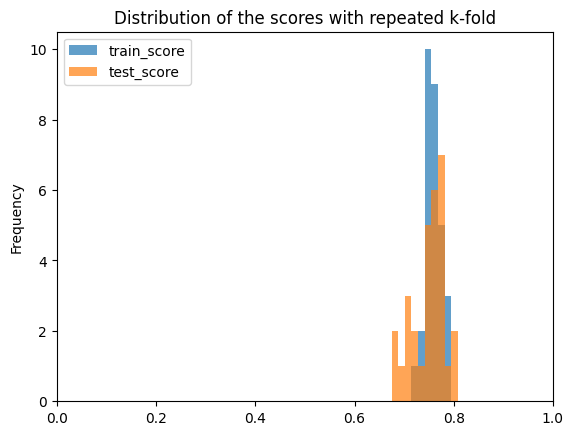

In [ ]:
ax = cv_results[["train_score", "test_score"]].plot.hist(alpha=0.7)
ax.set(xlim=(0, 1), title="Distribution of the scores with repeated k-fold")
plt.show()


The similar performance on training and testing sets with low variation indicates
our model generalizes well.


**EXERCISE**

Repeat the cross-validation using `KFold` with `shuffle=False`. Compare and explain
the differences from our previous analysis.

In [ ]:
# Write your code here.

In [95]:
cv = KFold(n_splits=5, shuffle=False)

cv_results = cross_validate(
    model,
    X,
    y,
    cv=cv,
    scoring="r2",  # r2, neg_mean_squared_error
    return_train_score=True,
)
cv_results = pd.DataFrame(cv_results)
display(cv_results[["train_score", "test_score"]])

Processing column   2 / 2


train_score  test_score
0     0.789425   -0.139073
1     0.776089    0.240167
2     0.735878    0.670314
3     0.654802    0.528873
4     0.778387   -0.174130

we have some negative test scores

r2 score negative: predict less than the average, it compares the mean

there is some ordering in the data

r2 on the test set is compared with the average of the red dots: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

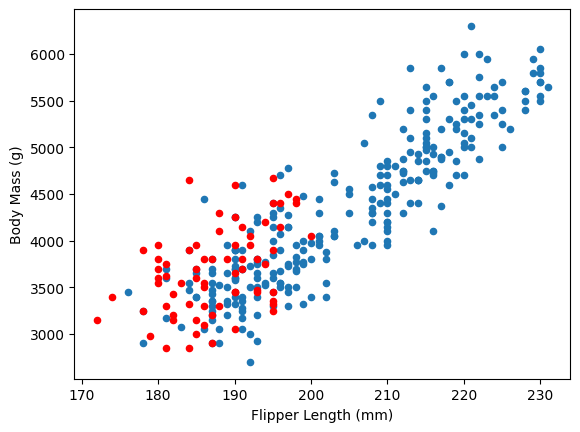

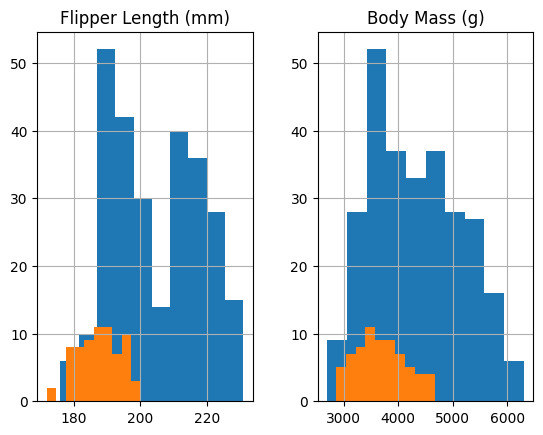

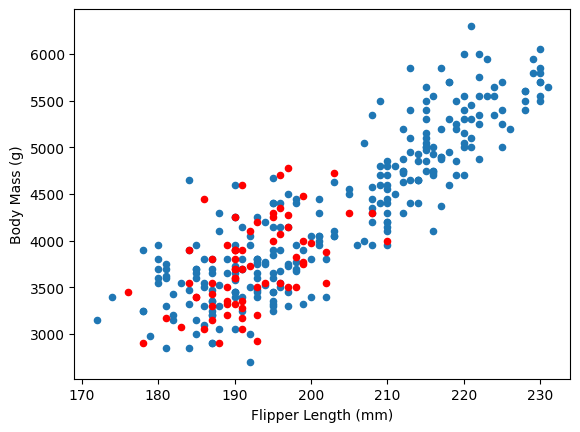

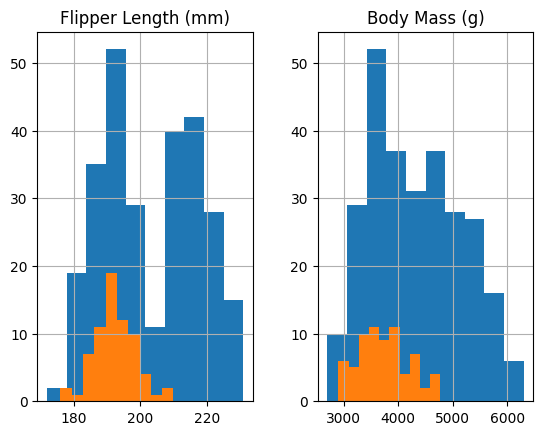

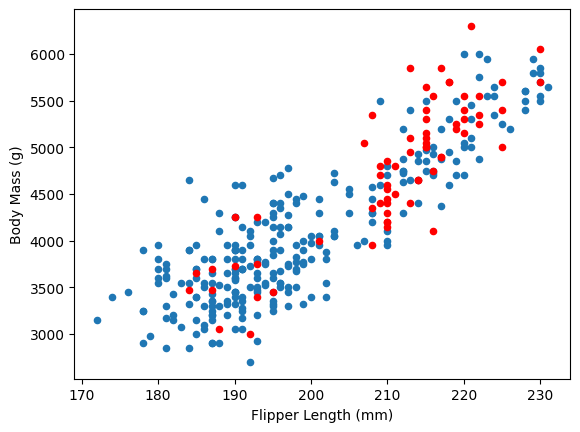

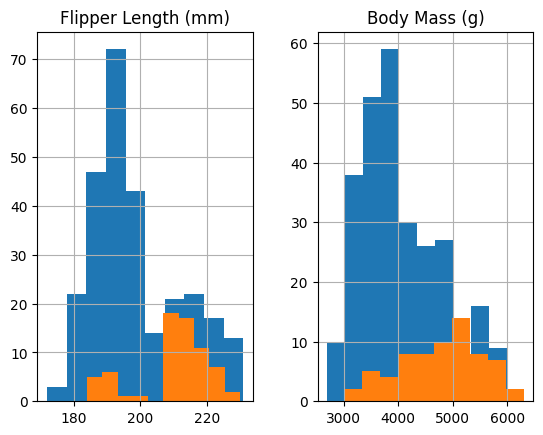

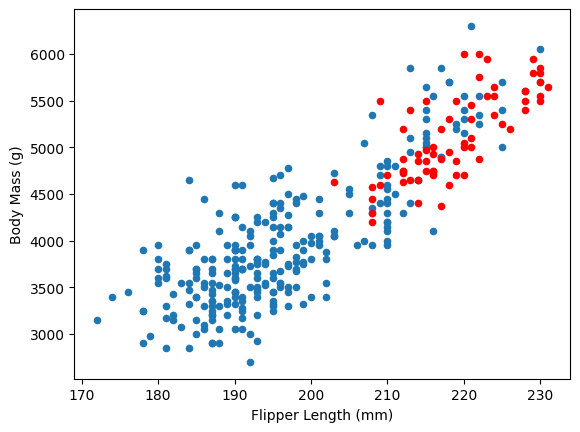

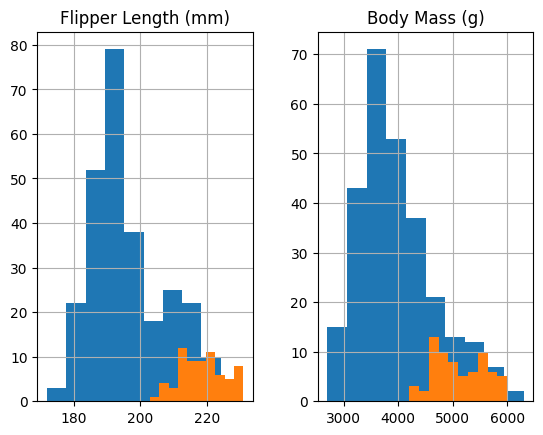

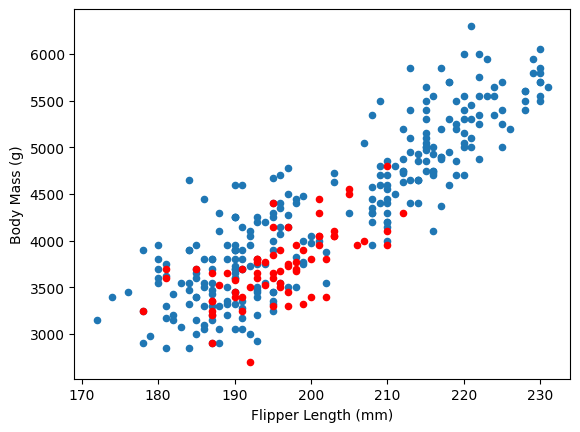

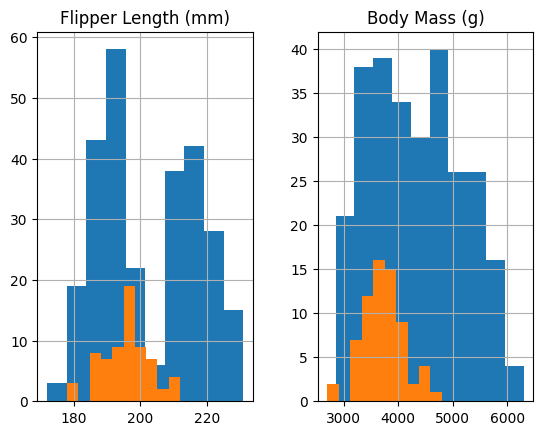

In [96]:
for train_idx, test_idx in cv.split(X, y):
    ax = data.loc[train_idx].plot.scatter(x=data.columns[0], y=data.columns[1])
    data.loc[test_idx].plot.scatter(x=data.columns[0], y=data.columns[1], ax=ax, color="r")

    ax = data.loc[train_idx].hist()
    data.loc[test_idx].hist(ax=ax)

Processing column   2 / 2


train_score  test_score
0     0.755386    0.775271
1     0.766991    0.725237
2     0.763649    0.741381
3     0.751685    0.783761
4     0.757714    0.759730

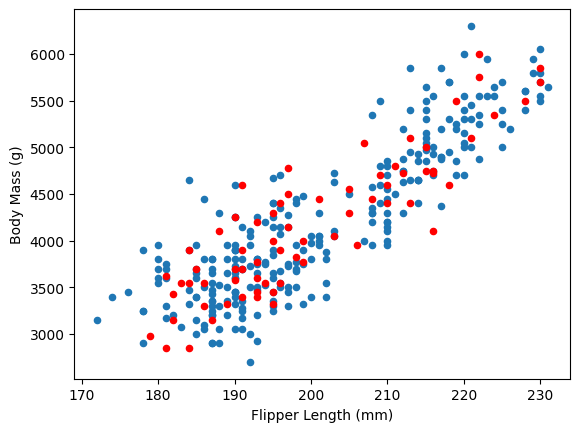

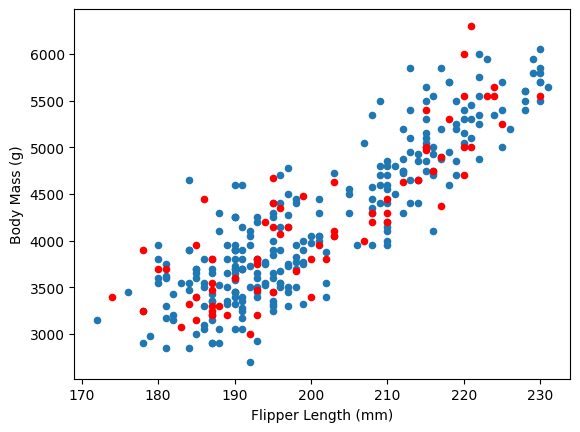

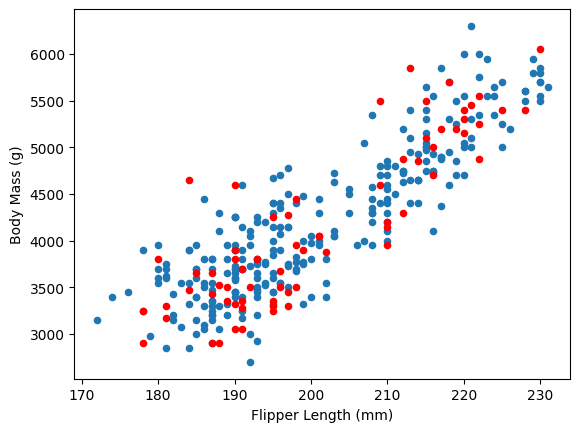

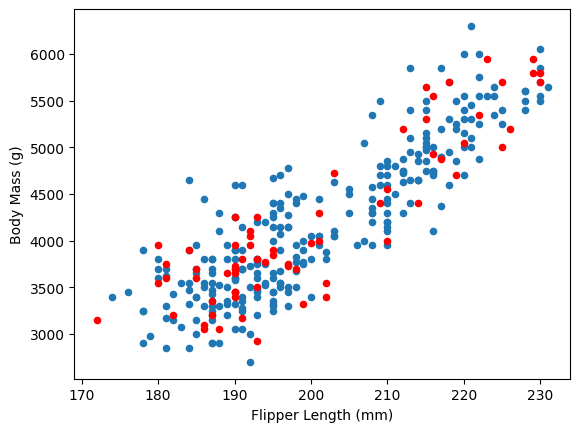

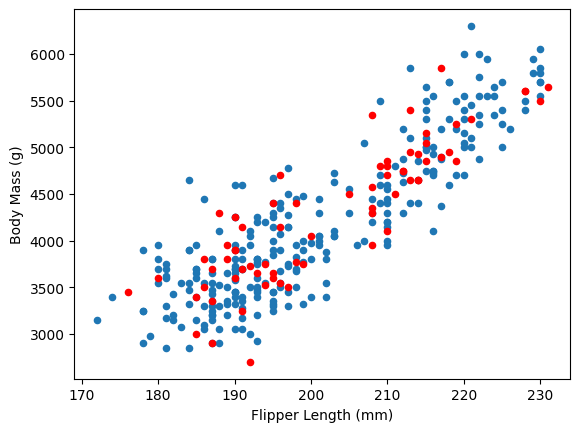

In [97]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(
    model,
    X,
    y,
    cv=cv,
    scoring="r2",  # r2, neg_mean_squared_error
    return_train_score=True,
)
cv_results = pd.DataFrame(cv_results)
display(cv_results[["train_score", "test_score"]])

for train_idx, test_idx in cv.split(X, y):
    ax = data.loc[train_idx].plot.scatter(x=data.columns[0], y=data.columns[1])
    data.loc[test_idx].plot.scatter(x=data.columns[0], y=data.columns[1], ax=ax, color="r")

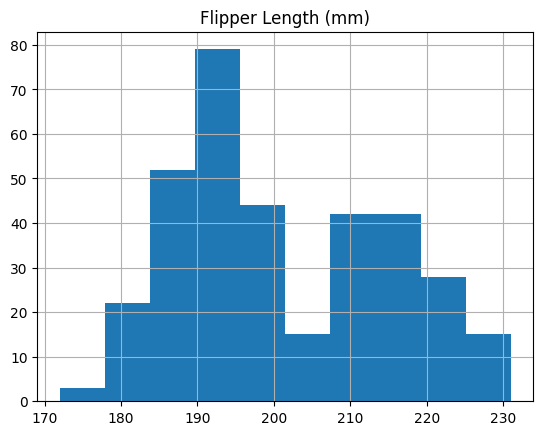

In [81]:
_ = X.hist()

we have 2 species of penguins


## Baseline model comparison

It is common to compare the performance of a new model against simple models.
These baseline models do not necessarily have to learn anything from the data.
But they provide a reference to compare against.

**EXERCISE**

Compare your linear model against such a baseline:

1. Use cross-validation to get 30+ score estimates
2. Try a `DummyRegressor` that predicts the mean target value of the training set
3. Use `permutation_test_score` function to estimate the performance of a random model
4. Plot test score distributions for all three models

In [99]:
# Write your code here.

from sklearn.dummy import DummyRegressor

cv = RepeatedKFold(n_repeats=10, n_splits=3, random_state=42)
dummy = DummyRegressor(strategy="mean")
cv_results_dummy = cross_validate(dummy, X, y, cv=cv, scoring="r2", return_train_score=True)
cv_results_dummy = pd.DataFrame(cv_results_dummy)
cv_results_dummy[["train_score", "test_score"]].aggregate(["mean", "std"])

Processing column   2 / 2


train_score  test_score
mean          0.0   -0.015119
std           0.0    0.019470

the R2 is 0 on the train, which is normal because dummy is the mean

<mark>missing the hist plots</mark>

permutation score: permute the y_pred in the folds

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html

In [102]:
from sklearn.model_selection import permutation_test_score

permutation_test_score(model, X, y, cv=cv)

(np.float64(0.7496085169545805),
 array([-0.02956902, -0.00663615, -0.01530175, -0.03453291, -0.01304214,
        -0.00031562, -0.00202881, -0.01482997,  0.00590799, -0.01353922,
        -0.01599622, -0.01721421, -0.02907801, -0.01646443, -0.01360318,
        -0.01707245, -0.00322186, -0.02392853, -0.01305016, -0.01108623,
        -0.03116477, -0.02935035, -0.02725425, -0.02923204, -0.01428453,
        -0.02221649, -0.01849948, -0.01183231, -0.01495707, -0.00862749,
        -0.01897626, -0.01496211, -0.0124805 , -0.02351627, -0.01956639,
        -0.01528714, -0.03003108, -0.00501129, -0.01528875, -0.01836387,
        -0.00430116, -0.01073122, -0.0167645 , -0.01947517, -0.01710381,
        -0.02158492, -0.02114953, -0.01135211, -0.01615231, -0.0166699 ,
        -0.01812931, -0.0168343 , -0.015735  , -0.01685838, -0.00839292,
        -0.01153505, -0.02059494, -0.02112065, -0.02338143, -0.01662745,
        -0.01180194, -0.00988283, -0.02083926, -0.01456953, -0.01712778,
        -0.0188577

In [103]:
permutation_test_score(dummy, X, y, cv=cv)

(np.float64(-0.015119260451528975),
 array([-0.0200183 , -0.00849055, -0.01129651, -0.02513904, -0.00668707,
        -0.01615588, -0.0154089 , -0.01341893, -0.0073352 , -0.00699371,
        -0.0148119 , -0.01488543, -0.02186665, -0.01346996, -0.01074768,
        -0.01279898, -0.0102413 , -0.01811743, -0.00988411, -0.01449046,
        -0.02606345, -0.0221438 , -0.01881644, -0.02362466, -0.00752686,
        -0.01365009, -0.01121759, -0.00705707, -0.01341147, -0.00952608,
        -0.01824753, -0.01038882, -0.00956582, -0.01251969, -0.01095253,
        -0.01197855, -0.02728085, -0.01249087, -0.01107515, -0.01612792,
        -0.01356501, -0.01180473, -0.01334715, -0.01859452, -0.00993009,
        -0.01413225, -0.01572009, -0.00719155, -0.01196095, -0.01337609,
        -0.01134525, -0.00838142, -0.01145608, -0.01224861, -0.00845593,
        -0.01659001, -0.01462572, -0.01447131, -0.01633196, -0.00951132,
        -0.01546455, -0.00650559, -0.01475906, -0.0148159 , -0.01257528,
        -0.0124

p-value: approximates the probability that the score would be obtained by chance


## Model uncertainty evaluation

Cross-validation evaluates uncertainty in the full fit/predict process by training
different models on each cross-validation split.

For a single model, we can evaluate prediction uncertainty through bootstrapping:

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


**EXERCISE**

1. Generate model predictions on the test set
2. Create 100 bootstrap prediction samples using `np.random.choice`
3. Plot the bootstrap sample distribution

In [ ]:
# we do not have the luxury to re-train the model

In [ ]:
# Write your code here.